# Дрва на одлучување

Дрво на одлучување е граф со дрвенеста структура каде секој јазол е прашање кое го дели на неколку дела даденото множество податоци. Врските во дрвото се одговорите на прашањето поставено од јазолот. Листовите на дрвото се излезите кои ќе ги произведе дрвото за даден влезен податок. 

Дрвото на одлучување ги класифицира дадените влезни податоци така што ќе започне од коренот и одејќи од јазол на јазол ќе стигне до некој лист чија вредност е излез за дадениот влезен податок.

Еве пример за дрво на одлучување кое ќе ни одговори кое превозно средство да го искористиме во зависност од моменталната состојба на денот во кој се наоѓаме.

![Пример за дрво на одлучување](decision_tree_example.png)

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Ова дрво го создаваме со помош на податоци со кои располагаме. Нека, на пример, пред нас ја имаме дадената табела од последните 12 дена. Од оваа табела може да биде создадено даденото дрво на одлучување.

In [38]:
df = pd.DataFrame(
    [['Sun', 44, True, 'Walk'], 
     ['Sun', 23, False, 'Bus'],
     ['Sun', 31, True, 'Walk'],
     ['Sun', 7, False, 'Bus'],
     ['Sun', 19, True, 'Bus'],
     ['Cloud', 34, True, 'Walk'],
     ['Cloud', 16, False, 'Bus'],
     ['Cloud', 6, True, 'Walk'],
     ['Cloud', 25, True, 'Walk'],
     ['Cloud', 71, False, 'Bus'],
     ['Rain', 12, False, 'Bus'],
     ['Rain', 34, True, 'Bus']], columns=['Wheather', 'Time', 'Hungry', 'Transport'])
df

,Wheather,Time,Hungry,Transport
0,Sun,44,True,Walk
1,Sun,23,False,Bus
2,Sun,31,True,Walk
3,Sun,7,False,Bus
4,Sun,19,True,Bus
5,Cloud,34,True,Walk
6,Cloud,16,False,Bus
7,Cloud,6,True,Walk
8,Cloud,25,True,Walk
9,Cloud,71,False,Bus


## Создавање дрво на одлучување

Основниот алгоритам за создавање дрво на одлучување е [ID3](https://en.wikipedia.org/wiki/ID3_algorithm). Алгоритамот го гради дрвото од коренот кон листовите и притоа користи алчен пристап. 
Накратко, алгоритамот оди вака:
*  Одреди која карактеристика е најдобро го дели множеството.
*  Означи ја таа карактеристика како јазол.
*  За секоја можна вредност на одбраната карактеристика ќе создадеме нов јазол кој ќе биде дете на моменталниот јазол.
*  Податоците кои ги имаме за моменталниот јазол ќе ги поделиме на сите негови деца според вредноста на одбраната карактеристика.
*  Ако новокреираните табели со дадените податоци се перфектно класифицирани, запираме, инаку истиот алгоритам го повторуваме за секој новокреиран јазол.

Главно прашање е како да одредиме која карактеристика е најдобра за да го подели множеството. За алгоритамот ID3 најдобра карактеристика е онаа која има најголема [информациска придобивка](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees). Оваа придобивка ја сметаме како мерка која ќе измери колку добро карактеристиката го дели множеството на групи за да можеме успешно да класифицираме. 

Алгоритамот е алчен бидејќи секогаш ја одбира најдобрата поделба само за момнеталната распределба на податоците, а не ја гледа најдобрата можност генерално за целото дрво.

Алгоритамот подразбира дека сите карактеристики се дискретни, а класификацијата е бинарна. 

### Информациска придобивка

Информациската придобивка е статистичка мерка која кажува колку добро карактеристиката го дели множеството на групи за да можеме успешно да класифицираме. На сликата (десно) може да видиме како една карактеристика го дели множеството на два дела. Двата дела имаат приближно еднаков број `+` и `-`. Едноставно, оваа поделба не нѐ води поблиску кон успешна класификација бидејќи подгрупите се хомогени. За разлика од ова, (лево) ја имаме карактеристиката со голема информациска придобивка која подобро го дели множеството бидејќи има изразена нехомогеност. Лесно забележуваме дека во едната подгрупа имаме повеќе `+`, а во другата имаме повеќе `-`. Ова нѐ води кон успешна класификација.

![Висока информациска придобивка](high_information_gain.png) 
![Ниска информациска придобивка](low_information_gain.png) 

Пред да ја дефинираме точно информациската придобивка, ќе дефинираме што значи [ентропија](https://en.wikipedia.org/wiki/Entropy_(information_theory) во теоријата на инфромации. 

#### Ентропија

Генерално, ентропијата е мерка за неред во едно множество. За нашиот проблем ентропијата ќе ни каже дали во едно многжество податоци, како претходно со `+` и `-`, имаме хомогеност или пак не. Ентропијата $H$ во теоријата на информации ја пресметуваме според равенката на научникот [Клод Шенон](https://en.wikipedia.org/wiki/Claude_Shannon)

$$ H = \sum_i - p_i \log p_i$$

За алгоритамот ID3, неговата бинарна класификација, и дадено множество $S$ каде излезите се означени со `+` и `-`, ентропијата ќе ја запишуваме како

$$ H(S) = - p_+ \log_2 p_+ - p_- \log_2 p_- $$

каде $p_+$ е подмножеството на $S$ каде излезот е `+`, а $p_-$ е подмножеството на $S$ каде излезот е `-`.

Вредноста која ќе ја добиеме е реален број. На пример, за 30 податоци каде 14 се `+`, а 16 се `-`, ќе добиеме дека ентропијата е 0.996. 

In [39]:
a = 14  # plus
b = 16  # minus
m = a + b
a, b, m

(14, 16, 30)

In [40]:
def entropy(a, b):
    """
    Function that calculates information entropy.
    :param a: subset A size
    :param b: subset B size
    :returns: entropy
    """
    if a == 0 or b == 0:
        return 0
    m = a + b
    return - a/m * np.log2(a/m) - b/m * np.log2(b/m)

entropy(a, b)

0.9967916319816366

Во зависност од бројот на `+` и `-` можеме да исцртаме график. Графикот ќе го исцртаме за 100 точки.

Text(0.5, 1.0, 'Ентропија за дадено множество')

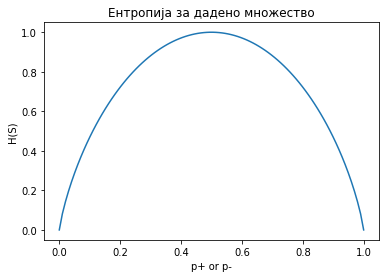

In [41]:
x = np.linspace(start=0, stop=1, num=100)
y = np.array([entropy(p, 1-p) for p in x])
plt.plot(x, y)
plt.xlabel('p+ or p-')
plt.ylabel('H(S)')
plt.title('Ентропија за дадено множество')

Од тука можеме да видиме дека ентропијата е 0 ако сите податоци од едно множество припаѓаат на една класа. Најголема е кога има ист број податоци од двете класи.

#### Духовита претстава на ентропијата според Стефан :D

Нека имаме $N$ гости. Ги прашуваме кој сака да пие пиво и ги класифицираме гостите во две групи: (1) пие пиво и (2) не пие пиво. Земаме одговор од секој од гостите и одиме во кујната. Таму ни се поставува прашањето "Кој рече дека ќе пие пиво?".
*  Најлесно е да запаметиме ако никој не пие пиво или пак сите ќе пијат.
*  Лесно е да запаметиме ако само еден нарачал пиво. Подеднакво лесно е да запаметиме ако само еден __не__ нерачал пиво.
*  Малку потешко е ако треба да запаметиме дека двајца ќе пијат пиво. Подеднакво тешко е ако треба да запаметиме дека двајца __нема__ да пијат пиво.
*  Уште малку потешко е ако треба да запаметиме дека тројца ќе пијат пиво. Подеднакво тешко е ако треба да запаметиме дека тројца __нема__ да пијат пиво.
*  ...
*  ...
*  ...
*  Најтешко е да запаметиме кои личности ќе пијат, а кои не, ако точно половина пијат, а другата половина не.

Всушност, она што треба да запаметиме е информацијата која ја носи анкетата направена врз гостите. Одговорите на гостите можеме да ги сметаме како стохастички извор на податоци. Ако секоја вечер ја правиме оваа анкета ќе добиеме распределба како на графикот горе. Ова е ентропијата.

Имајќи го предвид овој пример, многу полесно ќе ја разберете првата реченица на википедија која опишува што е [ентропија](https://en.wikipedia.org/wiki/Entropy_(information_theory)), цитирана подолу.

`Information entropy is the average rate at which information is produced by a stochastic source of data.`

Да се вратиме на алгоритамот ID3. Споменавме дека овој алгоритам за најдобра карактеристика ја одбира онаа која има најголема информациска придобивка. По трети пат, таа е мерка која ќе измери колку добро дадена карактеристика $a$ го дели множеството $S$ на групи за да можеме успешно да класифицираме. Генерално, ќе ја изразиме како разлика помеѓу моменталната ентропија на множеството $S$ и ентропијата која ќе ја пресметаме откако карактеристиката $a$ ќе го подели множеството на групи.

$$ IG(S, a) = H(S) - H(S|a) $$

Попрецизно ќе запишеме

$$ IG(S, a) = H(S) - \sum_v \frac{|S_a(v)|}{|S|} H(S_a(v)) $$

Тука $v$ е вредност на карактеристиката $a$ која го дели множеството на повеќе подмножества. Подмножеството на множеството $S$ за вредноста $v$ на карактеристиката $a$ го означуваме како $S_a(v)$. Ентропијата $H(S|a)$ откако $a$ ќе ги подели множеството ја пресметуваме како среднa вредност од ентропиите посебно пресметани за секоја вредност $v$ на карактеристиката $a$. Тие ентропии се помножени со тежински множител $\frac{|S_a(v)|}{|S|}$ кој кажува колкав дел се податоците во $S_a(v)$ од податоците во $S$.

Еве пример за дадено множество со 30 податоци од кои 14 се `+`, а 16 се `-`. Да ја пресметаме информациската придобивка.

![Информациска придобивка](information_gain.png)

Левото подмножество има 17 податоци, од кои 13 се `+`, а 4 се `-`. Тежинскиот множител ќе биде $\frac{17}{30}$. Ентропијата ќе ја пресметаме според функцијата `entropy()`со која веќе располагаме.

In [42]:
h1 = entropy(13, 4)
h1

0.7871265862012691

Десното подмножество има 13 податоци, од кои 1 е `+`, а 12 се `-`. Тежинскиот множител ќе биде $\frac{13}{30}$. Ентропијата ќе ја пресметаме според функцијата `entropy()`со која веќе располагаме.

In [43]:
h2 = entropy(1, 12)
h2

0.39124356362925566

Ентропијата на дадено множество веќе ја пресметавме погоре, но ќе ја пресметаму пак.

In [44]:
h_before_split = entropy(14, 16)
h_before_split

0.9967916319816366

Ентропијата $H(S|a)$ ќе ја пресметаме според дадената равенка.

In [45]:
h_after_split = 17/30 * h1 + 13/30 * h2
h_after_split

0.6155772764200632

За крај, ќе ја пресметаме информациската придобивка. Добиваме дека за оваа поделба на карактеристиката $a$ имаме информациска придобивка од 0.38.

In [46]:
information_gain = h_before_split - h_after_split
information_gain

0.38121435556157335

Ајде да пресметаме која карактеристика од `wheather`, `time` или пак `hungry` најдобро го дели множеството запишано во променливата `df` на почетокот на оваа дигитална тетратка.

In [47]:
df

,Wheather,Time,Hungry,Transport
0,Sun,44,True,Walk
1,Sun,23,False,Bus
2,Sun,31,True,Walk
3,Sun,7,False,Bus
4,Sun,19,True,Bus
5,Cloud,34,True,Walk
6,Cloud,16,False,Bus
7,Cloud,6,True,Walk
8,Cloud,25,True,Walk
9,Cloud,71,False,Bus


ID3 алгоритамот смета дека карактеристиките имаат дискретни вредности. 
*  `Wheather` има три различни вредности и тоа е во ред. 
*  `Hungry` има две различни вредности и тоа е во ред.
*  `Time` има многу различни вредности. Можеме да ги оставиме така, ама пологично е да направеме како што беше однапред предложено, да поставиме граница од 30 минути и да сметаме за сите податоци дали вреемто е над или под 30 минути. Всушност, така е и конструирано дрвото на одлучување дадено на почетокот на тетратака. Ќе поставиме нова колона Time_over_30 и ќе ја пополниме со `True` или `False`.

In [79]:
df['Time_over_30'] = df['Time'] > 30
# оваа редица служи за подредување на колоните бидејќи најлогично е излезната колона Transport да ни е најдесно.
df = df[['Wheather', 'Time', 'Time_over_30', 'Hungry', 'Transport']]
df

,Wheather,Time,Time_over_30,Hungry,Transport
0,Sun,44,True,True,Walk
1,Sun,23,False,False,Bus
2,Sun,31,True,True,Walk
3,Sun,7,False,False,Bus
4,Sun,19,False,True,Bus
5,Cloud,34,True,True,Walk
6,Cloud,16,False,False,Bus
7,Cloud,6,False,True,Walk
8,Cloud,25,False,True,Walk
9,Cloud,71,True,False,Bus


Сега ќе дефинираме нова функција која ќе ја пресмета информациската придобивка за дадено множество податоци. Оваа функција ќе ја користиме за пресметка на ентропијата на подмножествата податоци кога некоја карактеристика ќе го подели множеството.

In [81]:
def entropy_of_dataset(df, output_column, class_1, class_2):
#     ги земаме податоците од множеството df каде излезот е еднаков на класа 1
    class_1_data = df.query("{} == '{}'".format(output_column, class_1))
#     ги земаме податоците од множеството df каде излезот е еднаков на класа 2
    class_2_data = df.query("{} == '{}'".format(output_column, class_2))
#     ја пресметуваме ентропијата за даденото множество податоци
    return entropy(class_1_data.shape[0], class_2_data.shape[0])

Најдобрата карактеристика е онаа која има најголема информациска придобивка. Ќе ја пресметаме информациската придобивка за сите карактеристики и ќе одлучиме која е најдобра споредувајќи ги. Но, пред тоа треба да ја пресметаме ентропијата на даденото множество податоци.

In [82]:
output_column = 'Transport'
class_1 = 'Bus'
class_2 = 'Walk'

h_before_split = entropy_of_dataset(df, output_column, class_1, class_2)
h_before_split

0.9798687566511528

Карактеристиката `Wheather` има 3 различни вредности.

In [77]:
sun_data = df.query("Wheather == 'Sun'")
cloud_data = df.query("Wheather == 'Cloud'")
rain_data = df.query("Wheather == 'Rain'")

h_sun_data = entropy_of_dataset(sun_data, output_column, class_1, class_2)
h_cloud_data = entropy_of_dataset(cloud_data, output_column, class_1, class_2)
h_rain_data = entropy_of_dataset(rain_data, output_column, class_1, class_2)

print('h_sun_data', h_sun_data)
print('h_sun_data', h_sun_data)
print('h_rain_data', h_rain_data)
print()

factor_sun_data = sun_data.shape[0] / df.shape[0]
factor_cloud_data = cloud_data.shape[0] / df.shape[0]
factor_rain_data = rain_data.shape[0] / df.shape[0]

h_after_split_wheather = factor_sun_data * h_sun_data + factor_cloud_data * h_cloud_data + factor_rain_data * h_rain_data
information_gain_wheather = h_before_split - h_after_split_wheather

print('h_after_split_wheather', h_after_split_wheather)
print('information_gain_wheather', information_gain_wheather)

h_sun_data 0.9709505944546686
h_sun_data 0.9709505944546686
h_rain_data 0

h_after_split_wheather 0.8091254953788906
information_gain_wheather 0.17074326127226225


Карактеристиката `Time_over_30` има 2 различни вредности.

In [76]:
time_over_30_data = df.query("Time_over_30 == True")
time_under_30_data = df.query("Time_over_30 == False")

h_time_over_30_data = entropy_of_dataset(time_over_30_data, output_column, class_1, class_2)
h_time_under_30_data = entropy_of_dataset(cloud_data, output_column, class_1, class_2)

print('h_time_over_30_data', h_time_over_30_data)
print('h_time_under_30_data', h_time_under_30_data)
print()

factor_time_over_30_data = time_over_30_data.shape[0] / df.shape[0]
factor_time_under_30_data = time_under_30_data.shape[0] / df.shape[0]

h_after_split_time_30 = factor_time_over_30_data * h_time_over_30_data + factor_time_under_30_data * h_time_under_30_data
information_gain_time_30 = h_before_split - h_after_split_time_30

print('h_after_split_time_30', h_after_split_time_30)
print('information_gain_time_30', information_gain_time_30)

h_time_over_30_data 0.9709505944546686
h_time_under_30_data 0.9709505944546686

h_after_split_time_30 0.9709505944546686
information_gain_time_30 0.008918162196484225


Карактеристиката `Hungry` има 2 различни вредности.

In [84]:
hungry_data = df.query("Hungry == True")
not_hungry_data = df.query("Hungry == False")

h_hungry_data = entropy_of_dataset(time_over_30_data, output_column, class_1, class_2)
h_not_hungry_data = entropy_of_dataset(cloud_data, output_column, class_1, class_2)

print('h_hungry_data', h_hungry_data)
print('h_not_hungry_data', h_not_hungry_data)
print()

factor_hungry_data = hungry_data.shape[0] / df.shape[0]
factor_not_hungry_data = not_hungry_data.shape[0] / df.shape[0]

h_after_split_hungry = factor_hungry_data * h_hungry_data + factor_not_hungry_data * h_not_hungry_data
information_gain_hungry = h_before_split - h_after_split_hungry

print('h_after_split_hungry', h_after_split_hungry)
print('information_gain_hungry', information_gain_hungry)

h_hungry_data 0.9709505944546686
h_not_hungry_data 0.9709505944546686

h_after_split_hungry 0.9709505944546686
information_gain_hungry 0.008918162196484225


Заклучуваме дека најголема информациска придобивка има карактеристиката `Wheather`, па таа ја земам како прво прашање во нашето стебло на одлучување. Понатаму го решаваме истиот проблем посебно за секое подмножество на карактеристиката `Wheather`: `sun_data`, `cloud_data` и `rain_data` и бараме која карактеристика најдобро ќе ги подели нив.

## Дрва на одлучување преку библиотеката `scikit-learn`

In [124]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Како податочно множество ќе ги користиме една збирка податоци за ирис цвеќиња. Оваа збирка податоци многу често се користи како множество податоци за испитување на алгоритми за машинско учење, особено за луѓе кој почнуваат со студирање на оваа област. Затоа оваа збирка податоци е дел од библиотеката `scikit-learn`.

In [97]:
data = load_iris()
print('Classes to predict: ', data.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


Моментално податоците за наоѓаат во променливата `data` која е збирка од податоци, а ние треба соодветно да ги извадиме податоците.

In [107]:
X = data.data
y = data.target

print('Number of examples in the data:', X.shape[0])

Number of examples in the data: 150


Да видиме како изгледаат податоците. Има 4 карактеристики кои се измерени должини на цвеќењето.

In [109]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [112]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Ќе го поделиме множеството на множество за тренирање и множество за тестирање. Ќе тренираме на `X_train` и `y_train`, ќе погодуваме на `X_test`, а резултатите ќе ги споредуваме со `y_test`. Библиотеката има веќе готова функција за делење на множеството на овој начин, а ние само треба да кажеме колкав процент сакаме да биде множество за тренирање, а колкав процент да биде множество за тест.

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 155, test_size = 0.25)

Го создаваме класификаторот. Аргументите кои можете да ги испратите ќе ги погледнете во документацијата.

In [118]:
clf = DecisionTreeClassifier(criterion = 'entropy')

Со функцијата `fit()` му ги даваме податоците за тренирање на класификаторот за да тренира на нив. Тој во себе ќе го изгради дрвото на одлучување, а потоа ние ќе можеме д аго предвидиме излезот за нови податоци.

In [120]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Откако ќе истренира класификаторот, ќе му ги пратиме податоците за тест за тој да ги предвиди.

In [123]:
y_pred =  clf.predict(X_test)

`y_pred` Се предвидените податоци и треба да ги споредиме со точните. Ќе ја искористиме функцијата `accuracy_score()` за пресметка на точност на две множества податоци. Таа е дел од библиотеката `scikit-learn`.

In [95]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9736842105263158


Забележуваме дека точноста на множеството за тренирање е 1, што е својствено за дрвата на одлучување. Точноста на множеството за тест е нешто помала од 1. Ова е сосема логично бидејќи алгоритамот погодува податоци кои никогаш не ги видел.